### Lab 4 - IA

### Task 1

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
def gradient_descent(
    theta_0,
    cost_function,
    cost_function_gradient,
    learning_rate=0.01,
    threshold=0.001,
    max_iter=10000,
    params=[]
):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []

    while np.linalg.norm(cost_function_gradient(theta, *params)) > threshold and iteration < max_iter:
        iteration += 1
        theta -= learning_rate * cost_function_gradient(theta, *params)
        costs.append(cost_function(theta, *params))
        thetas.append(theta.copy())

    return theta, costs, thetas

def linear_cost(theta, X, y, lmbd):
    h = X @ theta
    reg = (lmbd / (2 * len(X))) * (theta[1:] ** 2).sum()
    return ((h - y) ** 2).sum() / (2 * len(X)) + reg


def linear_cost_gradient(theta, X, y, lmbd):
    h = X @ theta
    theta_copy = theta.copy()
    theta_copy[0] = 0
    reg_prime = lmbd * theta_copy / len(X)
    return ((X.T @ (h - y)) / len(X)) + reg_prime

### Task 1.1

Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un p.array para
ser trabajado en el notebook.

In [21]:
# Save CSV
data_df = pd.read_csv('kc_house_data.csv')

# To numpy array
npArray = data_df.values

# Show Data
print(npArray)
data_df.head()

[[7129300520 '20141013T000000' 221900.0 ... -122.257 1340 5650]
 [6414100192 '20141209T000000' 538000.0 ... -122.319 1690 7639]
 [5631500400 '20150225T000000' 180000.0 ... -122.233 2720 8062]
 ...
 [1523300141 '20140623T000000' 402101.0 ... -122.299 1020 2007]
 [291310100 '20150116T000000' 400000.0 ... -122.069 1410 1287]
 [1523300157 '20141015T000000' 325000.0 ... -122.299 1020 1357]]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Task 1.2

Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona
las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living)

In [22]:
# Get the desired values from the nested arrays
price = npArray[:, 2].astype(int) # Value to predict
sqft_living = npArray[:, 5].astype(int) # Value to train the model

# Create a matrix X for linear regression with an additional column of ones for the bias term
X = np.vstack((np.ones(len(sqft_living)), sqft_living)).T

# Reshape the price array to be a column vector
y = price.reshape(-1, 1)

# Initialize the parameters for gradient descent
theta = np.random.rand(2, 1)


### Task 1.3

Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase)

Optimal parameters: [[  0.75321329]
 [263.08888583]]
Final cost: 34330599974.735283


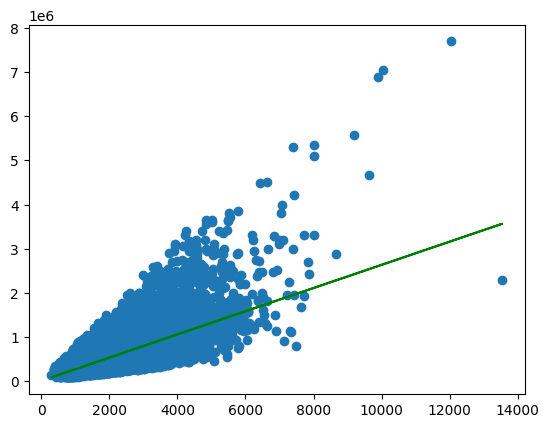

In [23]:
# Define the hyperparameters for gradient descent
learning_rate = 0.000000001
threshold = 0.001
max_iter = 10000

# Define the regularization parameter
lmbd = 1

# Perform gradient descent to find the optimal parameters
theta, costs, _ = gradient_descent(
    theta,
    linear_cost,
    linear_cost_gradient,
    learning_rate=learning_rate,
    threshold=threshold,
    max_iter=max_iter,
    params=[X, y, lmbd]
)

# Print the optimal parameters and the final cost
print("Optimal parameters:", theta)
print("Final cost:", linear_cost(theta, X, y, lmbd))

# Plot the data and the regression line
plt.scatter(sqft_living, price)
plt.plot(sqft_living, X @ theta, color='green')
plt.show()

### Task 1.4

Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor
balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).

Best polynomial degree: 6


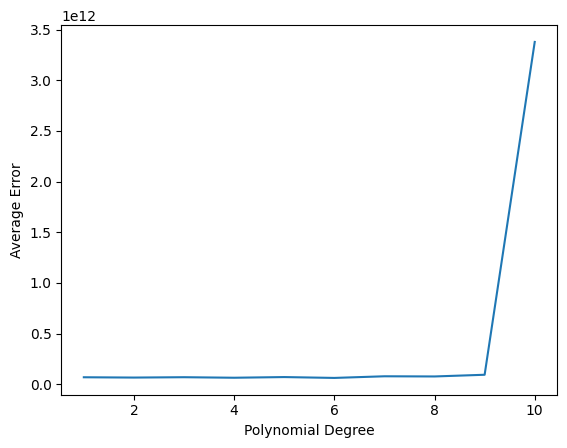

In [24]:
# Define the number of folds for cross-validation
num_folds = 10

# Initialize the array to store the average error for each polynomial degree
avg_error = np.zeros(10)


# Perform cross-validation using polynomial regression
for i in range(num_folds):
    # Divide the data into training and testing sets
    start, end = i * len(sqft_living) // num_folds, (i + 1) * len(sqft_living) // num_folds
    X_train = np.concatenate((X[:start], X[end:]))
    y_train = np.concatenate((y[:start], y[end:]))
    X_test = X[start:end]
    y_test = y[start:end]

    for degree in range(1, 11):
        # Perform polynomial regression on the training data
        poly_X_train = np.column_stack([X_train[:, 1]**d for d in range(1, degree+1)])
        poly_X_test = np.column_stack([X_test[:, 1]**d for d in range(1, degree+1)])
        coef = np.linalg.inv(poly_X_train.T @ poly_X_train) @ poly_X_train.T @ y_train

        # Calculate the predicted values on the test set and compute the mean squared error
        y_pred = poly_X_test @ coef
        mse = ((y_pred - y_test) ** 2).mean()

        # Update the average error for this degree
        avg_error[degree-1] += mse

# Divide the total error by the number of folds to get the average error for each degree
avg_error /= num_folds

# Find the degree with the lowest average error and print it
best_degree = np.argmin(avg_error) + 1
print("Best polynomial degree:", best_degree)

# Plot the average error as a function of the polynomial degree
plt.plot(range(1, 11), avg_error)
plt.xlabel('Polynomial Degree')
plt.ylabel('Average Error')
plt.show()

### Task 1.5

Haga un análisis sobre sus hallazgos

Observando el modelo de regresion lineal utlizado en este laboratorio, se puede observar que al realizar el algoritmo de regresion lineal con la funcion de descenso del gradiante, se obtiene unos resultados considerablemente precisos. Esto se puede observar en el grafico que se crea ya que la linea creada y la gran cantidad de datos se bien corelacionados y que estan creciendo de la misma manera. Luego se realizo cross-validation para encontrrar el grado de polinomio que mejor describa la punto y se utilizo 10 grados para encontrarlo. Donde se encontro que el mejor grado es el de 6. Adicionalmente tambien se ve que el grado 10 es el peor ya que hay un salto enorme de promedio de error al estar en el grado 10, como se puede observar en el grafico.